In [2]:
# Dependencies
# Data Processing
import pandas as pd
import numpy as np
import pickle

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
# Load the dataset
with open('wdbc.pkl', 'rb') as file:  # read binary
    data = pickle.load(file)

df = pd.DataFrame(data)

In [4]:
# Extract features and labels
features = df.iloc[:, 2:]
label = df['malignant']# to be predicted

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [6]:
# Random Forest Classifier
# Create instance of Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
# Fit model to training data
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Make predictions on the test set
rf_predictions = random_forest_classifier.predict(X_test)

In [8]:
# Evaluate the Random Forest Classifier
def evaluate_classifier(predictions, y_test, classifier_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"{classifier_name} Classifier:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

# Evaluate the Random Forest Classifier
evaluate_classifier(rf_predictions, y_test, "Random Forest")

Random Forest Classifier:
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524



Using the GraphViz library, the first decision tree from the forest was exported.

The colors represent the majority class of each node (box, with red indicating majority 0 (benign) and blue indicating majority 1 (malignant). The higher the colour intensity, the closer the node is to being 0 or 1.

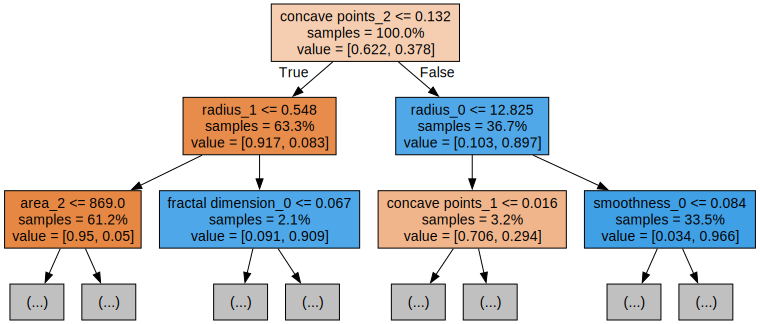

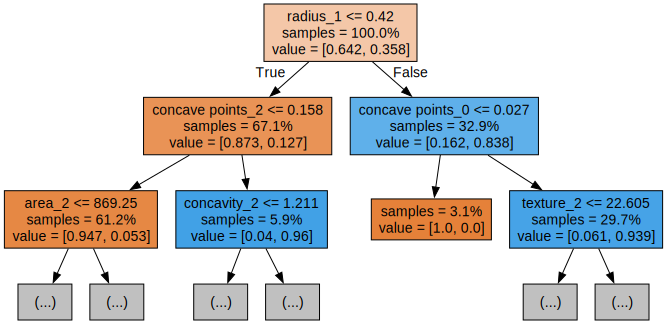

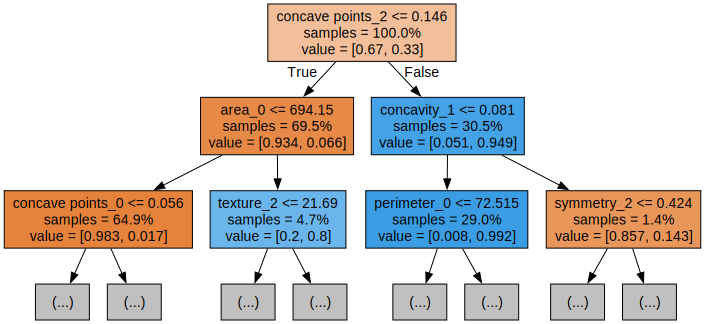

In [9]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = random_forest_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [10]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000229A67F50A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000229A67D9250>})

In [11]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 394}


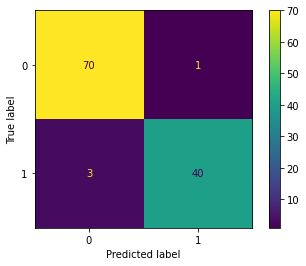

In [12]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

<Axes: >

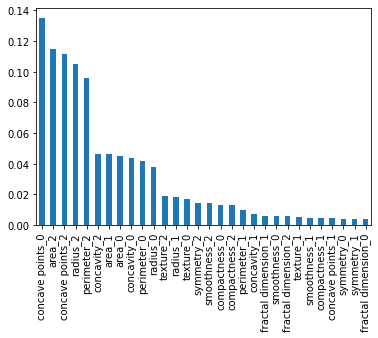

In [13]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()